



> <h1><center><b> Optimal Topic Modeling of Academic Papers</b></center>










This notebook presents an analysis of academic papers from different conferences to uncover latent topics using various topic modeling techniques like LDA, LSA, and NMF. The datasets consist of papers from the NeuralIPS, NIPS 2015, and NIPS conferences  <a href='#8,9,10'>[8, 9, 10]</a>


<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

## <b>GROUP 8<b>

#### <b>Group Members</b>

1. <b>Abhinav Kumar Singh (B00915090)</b>
2. <b>Dhanesh Walte (B00934223)</b>
3. <b>Navyanka Thorothu (B00945327)</b>  
4. <b>Sankalp Kulkarni (B00937233)</b>





### **Abstract:**

This project explores the application of topic modeling techniques to large collections of academic papers from prestigious machine learning conferences, namely Neural Information Processing Systems (NeuralIPS) and National Institute of Standards and Technology (NIPS). The aim is to uncover the latent thematic structures within the academic texts spanning several years, providing insights into the prevailing topics and trends in machine learning research over time.

### **Introduction:**

Topic modeling is a statistical technique for discovering the abstract "topics" that occur in a collection of documents. It is a powerful tool for summarizing large datasets of unstructured text by clustering groups of words and documents that best represent a set of topics. This project leverages Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and Non-negative Matrix Factorization (NMF) to identify and visualize these topics.

### **Objective:**

The primary objective is to determine the optimal number of topics that captures the essential thematic information in the datasets. This involves computing the coherence score for varying numbers of topics and identifying the point at which the score is maximized, indicating clear and interpretable topics.

## 1. Unziping, Extracting and Loading the Datasets  <a href='#6,7,8'>[6, 7, 8]</a>

In [ ]:
import pandas as pd
import os
import zipfile

# Paths to the uploaded zip files and their extraction directories
zip_files = {
    "NeuralIPS_1987-2019": "input/NeuralIPS_1987-2019.zip",
    "NIPS_2015": "input/NIPS_2015.zip",
    "NIPS_Papers": "input/NIPS_Papers.zip"
}
extracted_folders = {name: f"input/extracted/{name}" for name in zip_files}

# Extract the zip files
for name, path in zip_files.items():
    with zipfile.ZipFile(path, 'r') as zip_ref:
        os.makedirs(extracted_folders[name], exist_ok=True)
        zip_ref.extractall(extracted_folders[name])

# Load the CSV files
neuralips_papers = pd.read_csv(f"{extracted_folders['NeuralIPS_1987-2019']}/papers.csv")
nips_2015_papers = pd.read_csv(f"{extracted_folders['NIPS_2015']}/Papers.csv")
nips_papers = pd.read_csv(f"{extracted_folders['NIPS_Papers']}/papers.csv")


In [ ]:
neuralips_papers.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [ ]:
nips_2015_papers.head()

,Id,Title,EventType,PdfName,Abstract,PaperText
0,5677,Double or Nothing: Multiplicative Incentive Me...,Poster,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...
1,5941,Learning with Symmetric Label Noise: The Impor...,Spotlight,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...
2,6019,Algorithmic Stability and Uniform Generalization,Poster,6019-algorithmic-stability-and-uniform-general...,One of the central questions in statistical le...,Algorithmic Stability and Uniform Generalizati...
3,6035,Adaptive Low-Complexity Sequential Inference f...,Poster,6035-adaptive-low-complexity-sequential-infere...,We develop a sequential low-complexity inferen...,Adaptive Low-Complexity Sequential Inference f...
4,5978,Covariance-Controlled Adaptive Langevin Thermo...,Poster,5978-covariance-controlled-adaptive-langevin-t...,Monte Carlo sampling for Bayesian posterior in...,Covariance-Controlled Adaptive Langevin\nTherm...


In [ ]:
nips_papers

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
...,...,...,...,...,...,...,...
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...


In [ ]:
import pandas as pd

#  reload the CSV files containing the papers
try:
    neuralips_papers = pd.read_csv(f"{extracted_folders['NeuralIPS_1987-2019']}/papers.csv")
    nips_2015_papers = pd.read_csv(f"{extracted_folders['NIPS_2015']}/Papers.csv")
    nips_papers = pd.read_csv(f"{extracted_folders['NIPS_Papers']}/papers.csv")
    # Displaying the first few rows of each dataframe
    display_info = (neuralips_papers.head(), nips_2015_papers.head(), nips_papers.head())
except Exception as e:
    display_info = str(e)

display_info



(   source_id  year                                              title  \
 0         27  1987                         Bit-Serial Neural Networks   
 1         63  1987                        Connectivity Versus Entropy   
 2         60  1987        The Hopfield Model with Multi-Level Neurons   
 3         59  1987                               How Neural Nets Work   
 4         69  1987  Spatial Organization of Neural Networks: A Pro...   
 
   abstract                                          full_text  
 0      NaN  573 \n\nBIT - SERIAL NEURAL  NETWORKS \n\nAlan...  
 1      NaN  1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser  S...  
 2      NaN  278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...  
 3      NaN  442 \n\nAlan  Lapedes \nRobert  Farber \n\nThe...  
 4      NaN  740 \n\nSPATIAL  ORGANIZATION  OF  NEURAL  NEn...  ,
      Id                                              Title  EventType  \
 0  5677  Double or Nothing: Multiplicative Incentive Me...     Poster   
 1  5941  Learn

## 2. Data Preprocessing

These preprocessing steps are a crucial part of natural language processing (NLP) and are designed to convert raw text into a more analyzable form.

**Lowercasing:**

This step converts all the text to lowercase to ensure that the algorithm does not treat the same words in different cases as different words (e.g., “House” vs. “house”).

**Remove Special Characters and Digits:**

This uses a regular expression to remove any non-word characters and digits. This includes punctuation, special characters, and numerical values which typically do not contribute to the meaning of the text for topic modeling purposes.

**Tokenization:**

The text is split into individual elements called tokens. Typically, these tokens are words, but they can also be phrases or other meaningful elements. Tokenization is done using the word_tokenize method from the NLTK library.

**Remove Stop Words:**

Stop words are common words that carry little semantic weight in the given context and can be removed without losing meaning (e.g., “the”, “is”, “and”). Removing these can help reduce the dimensionality of the data and improve the focus on relevant words.

**Filter Out Short Words:**

This step involves removing words that are one character long. Single characters are usually artifacts of the cleaning process (like "a" after removing "'s") and do not contain useful information.

**Lemmatization:**

Words are reduced to their base or root form. For example, “running” becomes “run”. Lemmatization considers the context and converts the word to its meaningful base form, whereas stemming simply chops off the ends of words. The WordNetLemmatizer from NLTK is used for this process.


The following code cells will clean and preprocess the text data from the academic papers, preparing it for the topic modeling algorithms. This includes removing special characters, lowercasing, and vectorizing the text.

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function for cleaning and preprocessing text
def clean_text(text):
    if pd.isna(text):
        return ""
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove Stop words and filter out words with length of 1
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return " ".join(lemmatized_tokens)

# Applying preprocessing to the 'text' column of each dataset
neuralips_papers['text_processed'] = neuralips_papers['full_text'].apply(lambda x: clean_text(x))
nips_2015_papers['text_processed'] = nips_2015_papers['PaperText'].apply(lambda x: clean_text(x))
nips_papers['text_processed'] = nips_papers['paper_text'].apply(lambda x: clean_text(x))


[nltk_data] Downloading package punkt to /Users/dhanesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhanesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dhanesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
neuralips_papers['full_text']

0       573 \n\nBIT - SERIAL NEURAL  NETWORKS \n\nAlan...
1       1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser  S...
2       278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3       442 \n\nAlan  Lapedes \nRobert  Farber \n\nThe...
4       740 \n\nSPATIAL  ORGANIZATION  OF  NEURAL  NEn...
                              ...                        
9675    Discrete Object Generation\n\nwith Reversible ...
9676    Adaptively Aligned Image Captioning via\n\nAda...
9677    Fully Dynamic Consistent Facility Location\n\n...
9678    Efﬁcient Rematerialization for Deep Networks\n...
9679    Flow-based Image-to-Image Translation\n\nwith ...
Name: full_text, Length: 9680, dtype: object

In [ ]:
neuralips_papers['text_processed']

0       bit serial neural network alan murray anthony ...
1       connectivity versus entropy yaser abu mostafa ...
2       hopfield model mul ti level neuron michael fle...
3       alan lapedes robert farber theoretical divisio...
4       spatial organization neural nen orks probabili...
                              ...                        
9675    discrete object generation reversible inductiv...
9676    adaptively aligned image captioning via adapti...
9677    fully dynamic consistent facility location vin...
9678    efﬁcient rematerialization deep network ravi k...
9679    flow based image image translation feature dis...
Name: text_processed, Length: 9680, dtype: object

## 3. Exploratory Data Analysis (EDA)

### i. Most Common Words
This analysis identifies the most frequently occurring words in the datasets.

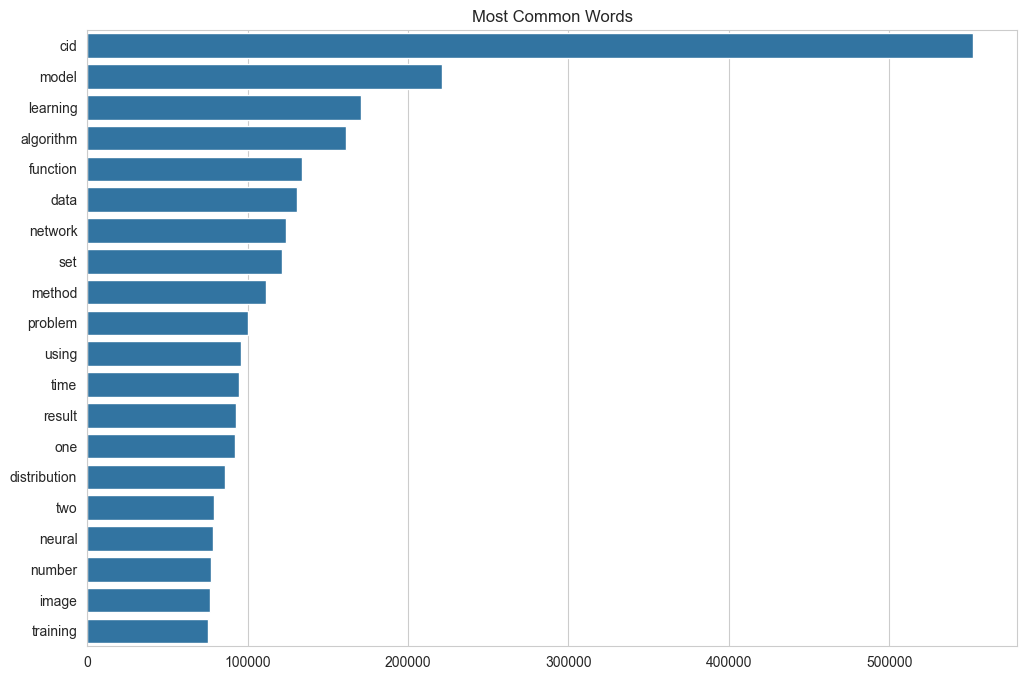

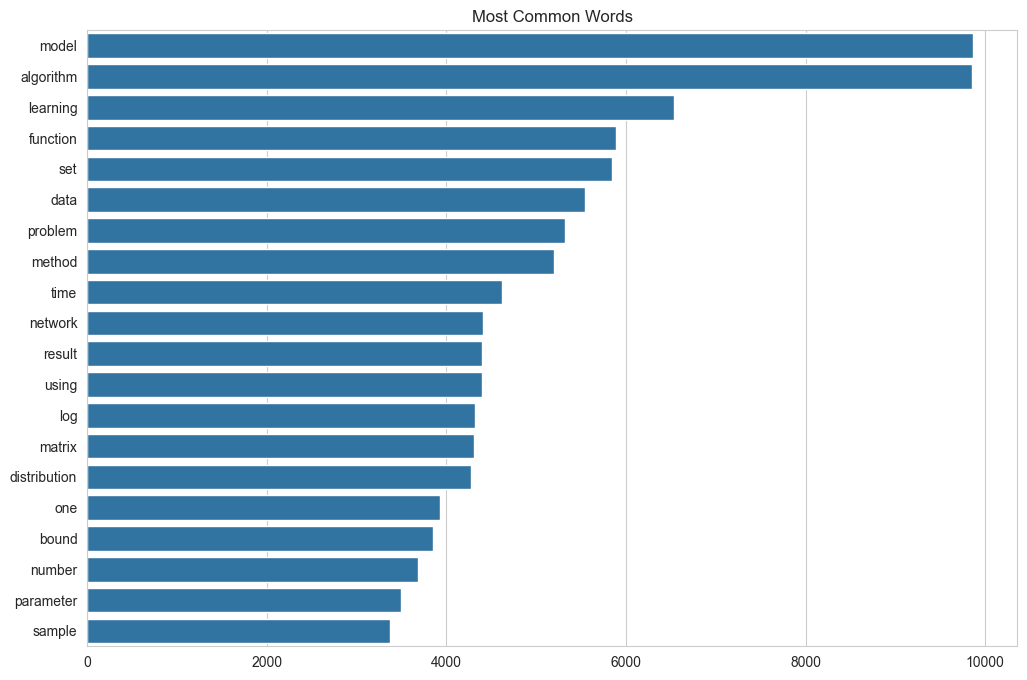

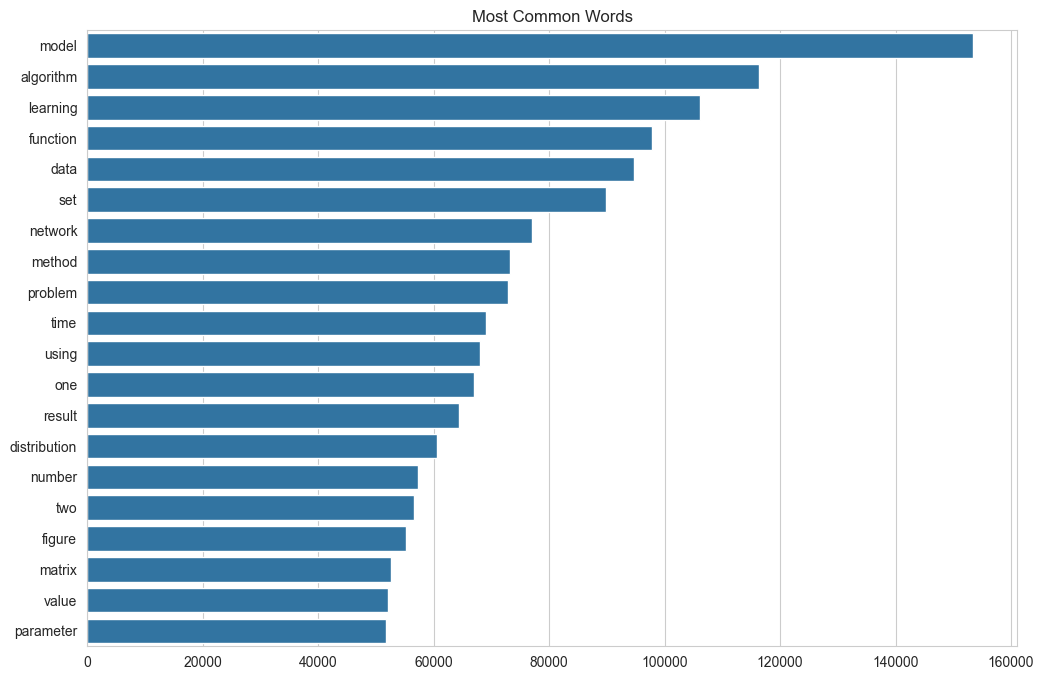

In [ ]:
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    'NeuralIPS_1987-2019': neuralips_papers,
    'NIPS_2015': nips_2015_papers,
    'NIPS_Papers': nips_papers
}

def plot_most_common_words(dataset, column, num_words=20):
    # Tokenize and create a counter object
    all_words = list(itertools.chain(*dataset[column].str.split()))
    word_counts = Counter(all_words)

    # Most common words
    common_words = word_counts.most_common(num_words)
    words, counts = zip(*common_words)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words))
    plt.title('Most Common Words')
    plt.show()

plot_most_common_words(neuralips_papers, 'text_processed')

plot_most_common_words(nips_2015_papers, 'text_processed')

plot_most_common_words(nips_papers, 'text_processed')

#### **Graph Descriptions**

**Graph 1:** Most Common Words in neuralips_papers Dataset

This graph displays the 20 most frequent words found in the NeuralIPS dataset spanning papers from 1987 to 2019. The word "model" appears to be the most common, followed by "learning," "algorithm," "function," and "data." The prevalence of these terms suggests a strong focus on machine learning models and algorithms within this dataset.

**Graph 2:** Most Common Words in nips_2015_papers Dataset

For the NIPS_2015 dataset, the graph similarly lists the top words, with "model" again leading the count. However, words like "image" and "training" appear, indicating that the papers from this year might have had a particular emphasis on image processing and the training of models.

**Graph 3:** Most Common Words in nips_papers Dataset

In this graph representing a broader collection of NIPS papers, terms like "model," "algorithm," "learning," and "network" are the most common. This indicates a general trend in the dataset towards network-based learning algorithms and model development.

### ii. Word Clouds
Word clouds visually represent the frequency of words, with more frequent words appearing larger.

#### Word cloud for Dataset 1

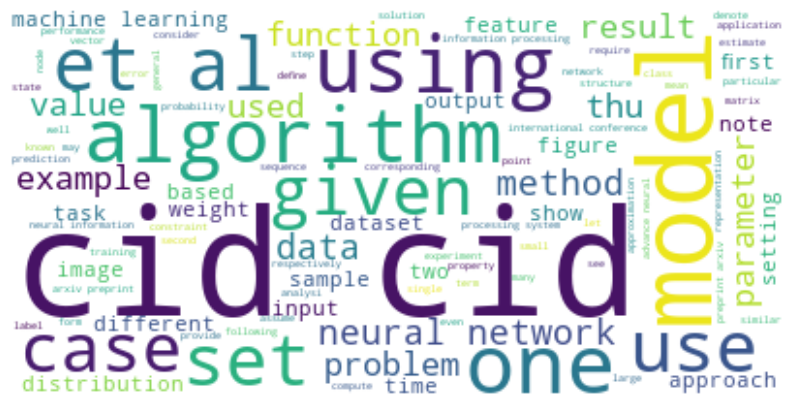

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(dataset, column, max_words=100):

    if len(dataset) > 1000:
        text = " ".join(sample for sample in dataset[column].sample(1000))
    else:
        text = " ".join(sample for sample in dataset[column])

    # Generate the word cloud with a limited number of words
    wordcloud = WordCloud(background_color="white", max_words=max_words).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Create a word cloud for dataset
plot_word_cloud(neuralips_papers, 'text_processed')


#### Word cloud for Dataset 2

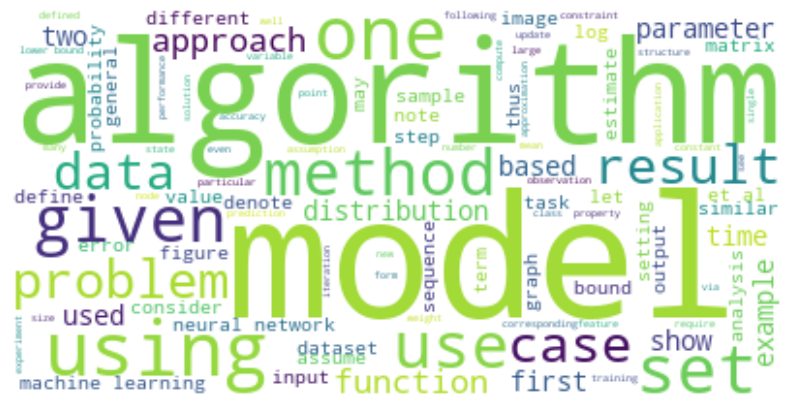

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(dataset, column, max_words=100):

    if len(dataset) > 1000:
        text = " ".join(sample for sample in dataset[column].sample(1000))
    else:
        text = " ".join(sample for sample in dataset[column])

    # Generate the word cloud with a limited number of words
    wordcloud = WordCloud(background_color="white", max_words=max_words).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Create a word cloud
plot_word_cloud(nips_2015_papers, 'text_processed')


#### Word cloud for Dataset 3

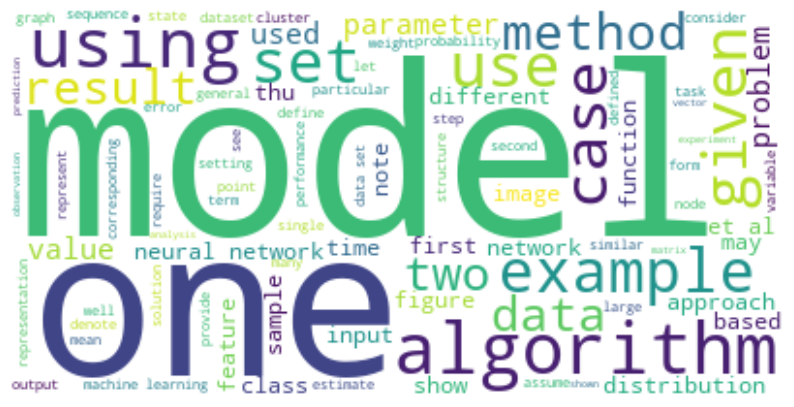

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(dataset, column, max_words=100):

    if len(dataset) > 1000:
        text = " ".join(sample for sample in dataset[column].sample(1000))
    else:
        text = " ".join(sample for sample in dataset[column])

    # Generate the word cloud with a limited number of words
    wordcloud = WordCloud(background_color="white", max_words=max_words).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Create a word cloud
plot_word_cloud(nips_papers, 'text_processed')


### iii. N-gram Analysis
This analysis looks at the frequency of pairs or triplets of words (bigrams or trigrams) to capture phrases.

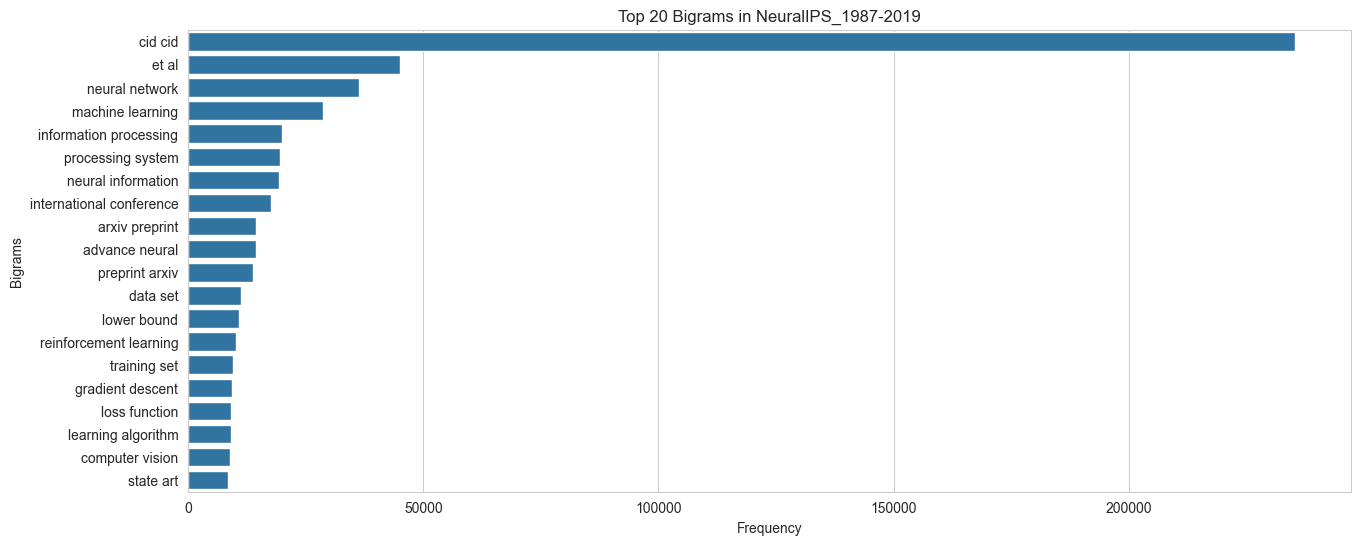

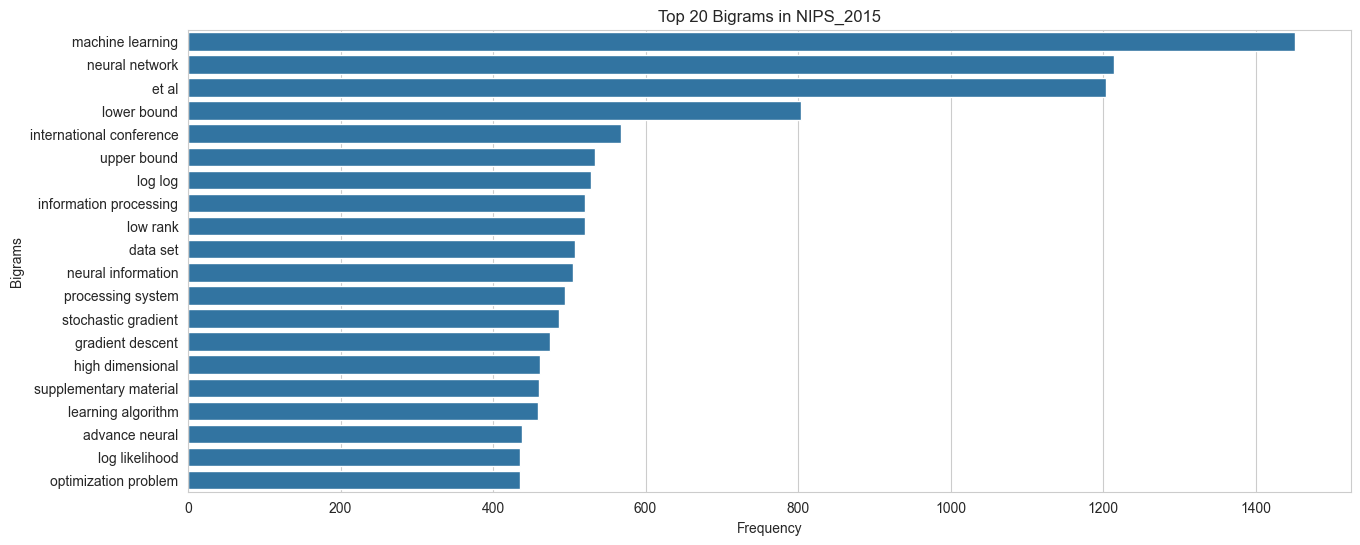

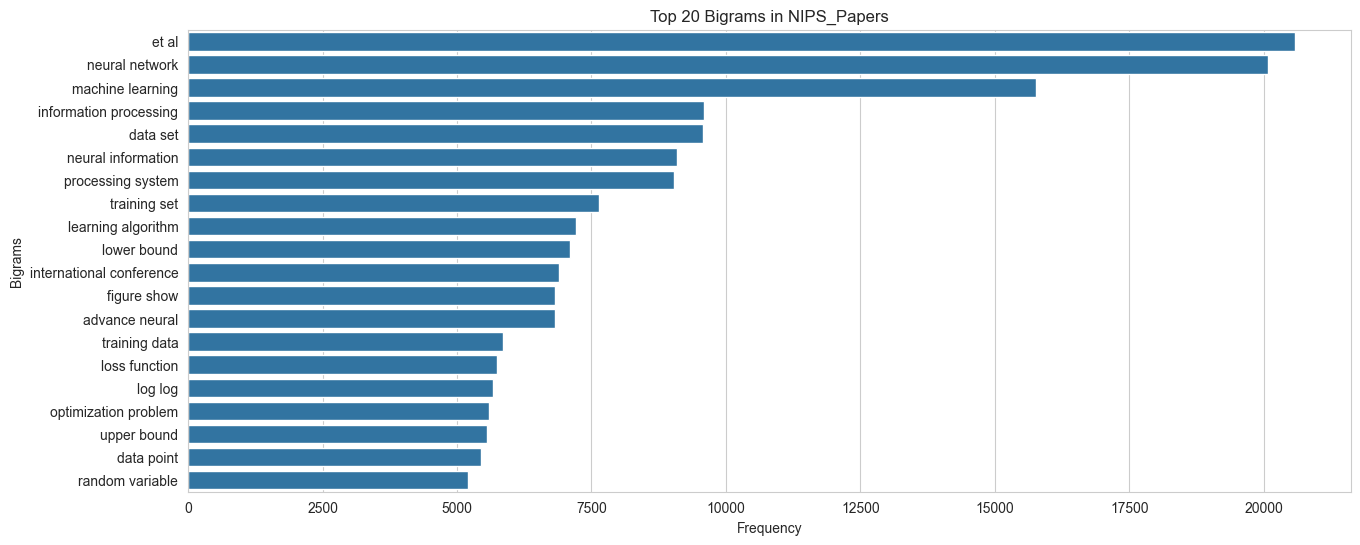

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_n_grams(corpus, n=None, n_grams=2):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams), max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_top_n_grams(corpus, n_grams=2, top_n=20):
    top_n_grams = get_top_n_grams(corpus, n=top_n, n_grams=n_grams)
    x,y = map(list,zip(*top_n_grams))
    sns.barplot(x=y, y=x)
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a top n-grams plot for each dataset
datasets = {
    'NeuralIPS_1987-2019': neuralips_papers,
    'NIPS_2015': nips_2015_papers,
    'NIPS_Papers': nips_papers
}

for name, dataset in datasets.items():

    non_null_texts = dataset['text_processed'].dropna()

    plt.figure(figsize=(15, 6))
    plot_top_n_grams(non_null_texts, n_grams=2, top_n=20)
    plt.title(f'Top 20 Bigrams in {name}')
    plt.show()


**Graph Descriptions and Insights:**

**NeuralIPS Bigrams:**

* The most frequent bigram "cid cid" might be an artifact of the text processing and likely doesn't carry meaningful information.

* Terms like "neural network", "machine learning", "information processing", and "reinforcement learning" are prevalent, indicating these are key areas of focus in the NeuralIPS papers over the years.

* The occurrence of "gradient descent", a popular optimization algorithm, suggests many papers discuss algorithmic development for machine learning.

* References to "arxiv preprint" and "preprint arxiv" highlight the common practice of pre-publishing research on the arXiv platform.

**NIPS_2015 Bigrams:**

* Here, "machine learning" and "neural network" are also among the top bigrams, reinforcing these as central topics.
* The presence of "lower bound" and "upper bound" indicates a focus on theoretical aspects of algorithms, possibly discussing their performance limits.
* "Stochastic gradient" and "gradient descent" suggest active discussions around optimization methods for training models.
* "Information processing" and "processing system" reflect the conference's full name, indicating a broader scope beyond neural networks.

**NIPS_Papers Bigrams:**

* Similar to the other datasets, "neural network" and "machine learning" are predominant, emphasizing the enduring relevance of these topics in the field.
* "Data set" and "training set" point to discussions about data handling and model training processes.
* Bigrams like "optimization problem" and "loss function" suggest a strong focus on the mathematical formulations and solutions in machine learning research.
* "Figure show" likely appears in the context of discussing results and findings graphically.

## 4. Compute Optimal K value  <a href='#12'>[12]</a>

In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    max_coherence, optimal_topic_count = -1, -1
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=0)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        if coherencemodel.get_coherence() > max_coherence:
            max_coherence = coherencemodel.get_coherence()
            optimal_topic_count = num_topics
    return coherence_values, optimal_topic_count

# Function to prepare data for coherence calculation
def prepare_data_for_coherence(dataset):
    # Tokenization and other preprocessing steps
    processed_texts = [text.split() for text in dataset.dropna()]

    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(processed_texts)

    # Create a corpus from the dictionary and processed_texts
    corpus = [dictionary.doc2bow(text) for text in processed_texts]

    return processed_texts, dictionary, corpus


Processing NeuralIPS_1987-2019 dataset for coherence...


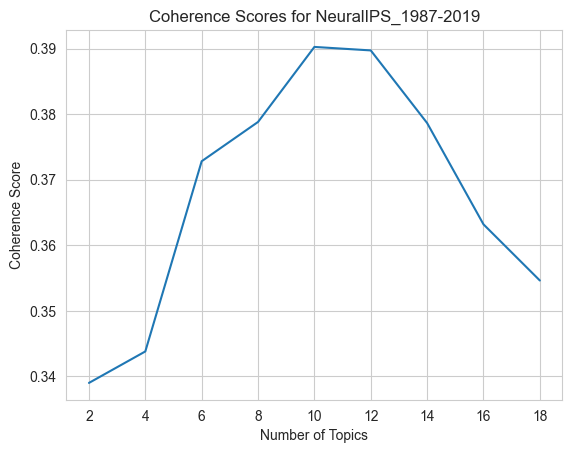

Processing NIPS_2015 dataset for coherence...


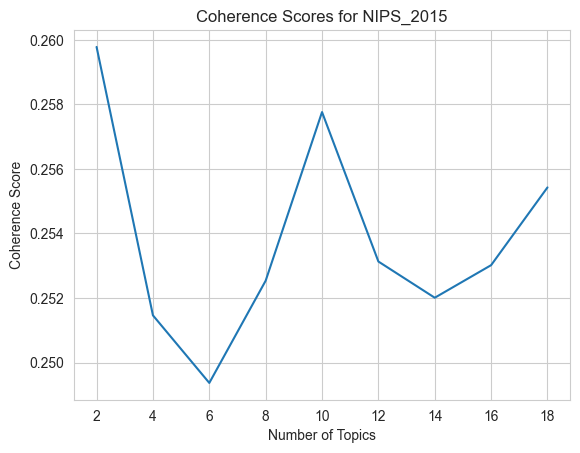

Processing NIPS_Papers dataset for coherence...


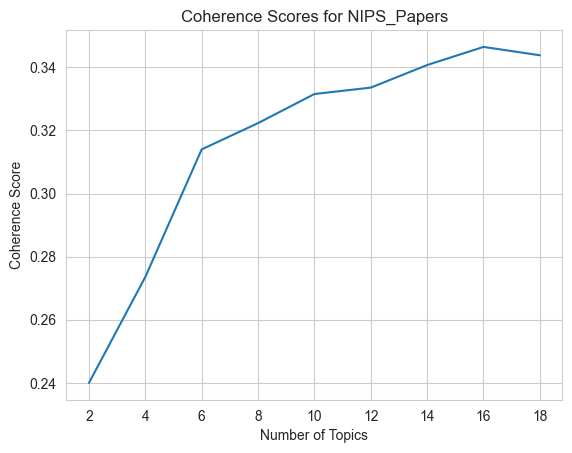

In [ ]:
# Datasets dictionary
datasets = {
    'NeuralIPS_1987-2019': neuralips_papers['text_processed'],
    'NIPS_2015': nips_2015_papers['text_processed'],
    'NIPS_Papers': nips_papers['text_processed']
}
optimal_topics = {}

# Parameters for coherence calculation
start, limit, step = 2, 20, 2


# Iterate over each dataset
for name, dataset in datasets.items():
    print(f"Processing {name} dataset for coherence...")

    # Prepare data
    texts, dictionary, corpus = prepare_data_for_coherence(dataset)

    # Compute coherence values
    coherence_values, optimal_topic_count = compute_coherence_values(dictionary, corpus, texts, limit, start=start, step=step)
    optimal_topics[name] = optimal_topic_count

    # Plotting
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title(f"Coherence Scores for {name}")
    plt.show()


In [ ]:
optimal_topics

{'NeuralIPS_1987-2019': 10, 'NIPS_2015': 2, 'NIPS_Papers': 16}

These three graphs show the coherence scores for topic models trained on different datasets. The coherence score is a measure used in topic modeling to judge how good a given topic model is. It is based on the semantic similarity between high scoring words in each topic. The higher the coherence score, the better the model is at generating meaningful topics.

**NeuralIPS Dataset:**
This graph shows a coherence score that increases with the number of topics, peaking at around 10 topics before it starts to decline. This suggests that for this dataset, the model with 10 topics has the highest semantic similarity between the words of each topic, indicating a meaningful grouping of topics. Beyond this point, the coherence starts to decrease, which could be a sign of overfitting or the model starting to divide topics too finely.

**NIPS_2015 Dataset:**
The graph for this dataset has a more erratic pattern, with a significant dip and peak around 6 and 10 topics respectively. The highest coherence score is at 10 topics, which suggests this is the optimal number of topics for this dataset. However, the erratic pattern suggests that some topic numbers may not produce as distinct or semantically coherent topics.

**NIPS_Papers Dataset:**
Here, the coherence score consistently rises with the number of topics, leveling off after about 14 topics. The trend suggests that increasing the number of topics generally leads to more coherent topics up to a point, after which the gain in coherence becomes marginal. The leveling off could indicate that the additional topics are not contributing significant new information or distinction between the topics.

In summary, based on the coherence score graphs, the optimal number of topics for each dataset would be where each graph reaches its peak before the coherence score starts to decline. This is at 10 topics for both the NeuralIPS and NIPS_2015 datasets, and around 14 for the NIPS_Papers dataset.

## 5. Model Building using LDA, LSA, NMF <a href='#4,5,6,11'>[4, 5, 6, 11]</a>

Topic modeling is a type of statistical modeling for discovering abstract topics that occur in a collection of documents. It is frequently used in text mining and natural language processing to uncover hidden semantic structures in textual data.

## **Latent Dirichlet Allocation (LDA):**

**Overview:**

LDA is a generative probabilistic model that assumes documents are a mixture of topics and that each topic is a mixture of words. It operates under the premise that each document can be represented as a distribution over topics, and each topic can be represented as a distribution over words.

**Strengths:**

LDA is good at handling large sets of unstructured text.
It can capture complex patterns in the data and is flexible enough to model various types of interactions between words.
LDA models are interpretable; the topics often make sense to humans, assuming the number of topics is chosen appropriately.

**Use in Topic Modeling:**

LDA is one of the most common topic modeling techniques due to its robustness and the interpretability of the results. It’s widely used across different domains for grouping words into topics and documents into mixtures of topics.

## **Latent Semantic Analysis (LSA), also known as Latent Semantic Indexing (LSI):**

**Overview:**

LSA uses singular value decomposition (SVD) on the document-term matrix to identify patterns and relationships between words and documents. It reduces the dimensionality of the data by projecting it into a lower-dimensional space, capturing the underlying structure.

**Strengths:**

LSA can effectively handle synonyms and polysemy (words that have multiple meanings) by mapping related words onto the same concepts.
It is computationally less intensive than LDA and can be faster on large corpora.
LSA is also used for information retrieval and can improve search accuracy.

**Use in Topic Modeling:**

LSA is useful for identifying synonymy and polysemy within the text data. It is well-suited for tasks where the relationship between words and concepts is more important than the exact word frequencies.

## **Non-negative Matrix Factorization (NMF):**

**Overview:**

NMF factorizes the document-term matrix into two lower-dimensional non-negative matrices, often interpreted as the representation of documents as a linear combination of latent topics, and topics as a linear combination of words.

**Strengths:**

NMF leads to a parts-based representation because it constrains the factors to be non-negative, which often makes the resulting topics more interpretable.
It is well-suited for sparse data and can be used with TF-IDF weighted document-term matrices, which can emphasize the importance of rarer but more informative words.
NMF can sometimes produce better clustering results than LDA or LSA.

**Use in Topic Modeling:**

NMF is commonly used in topic modeling for its ability to produce sparse and interpretable topic representations. It’s particularly effective when the goal is to identify parts of the data that combine to form wholes, such as topics made up of sets of words.

In [ ]:
# Import necessary libraries for data manipulation and machine learning
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF


In [ ]:

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [ ]:
# Number of topics and words
num_topics = 10
no_top_words = 10

# Datasets dictionary
datasets = {
    'NeuralIPS_1987-2019': neuralips_papers,
    'NIPS_2015': nips_2015_papers,
    'NIPS_Papers': nips_papers
}

fitted_count_vectorizers = {}
fitted_tfidf_vectorizers = {}

# Dictionaries to store trained models
trained_lda_models = {}
trained_lsa_models = {}
trained_nmf_models = {}

# Iterate over each dataset
for name, dataset in datasets.items():
    print(f"Training models for {name} dataset...")

    # LDA Model
    count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    lda_doc_term_matrix = count_vectorizer.fit_transform(dataset['text_processed'].dropna().values.astype('U'))
    lda = LatentDirichletAllocation(n_components=optimal_topics[name], random_state=0)
    lda.fit(lda_doc_term_matrix)
    print(f"LDA Model Topics for {name}:")
    display_topics(lda, count_vectorizer.get_feature_names_out(), no_top_words)
    trained_lda_models[name] = lda
    fitted_count_vectorizers[name] = count_vectorizer

    # LSA Model
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    lsa_doc_term_matrix = tfidf_vectorizer.fit_transform(dataset['text_processed'].dropna().values.astype('U'))
    lsa = TruncatedSVD(n_components=optimal_topics[name], random_state=0)
    lsa.fit(lsa_doc_term_matrix)
    print(f"\nLSA Model Topics for {name}:")
    display_topics(lsa, tfidf_vectorizer.get_feature_names_out(), no_top_words)
    trained_lsa_models[name] = lsa
    fitted_tfidf_vectorizers[name] = tfidf_vectorizer

    # NMF Model
    nmf = NMF(n_components=optimal_topics[name], random_state=0)
    nmf.fit(lsa_doc_term_matrix)
    print(f"\nNMF Model Topics for {name}:")
    display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), no_top_words)
    trained_nmf_models[name] = nmf

print("\nTraining completed for all models.")

Training models for NeuralIPS_1987-2019 dataset...
LDA Model Topics for NeuralIPS_1987-2019:
Topic 0:
state cid model neuron time learning policy network neural input
Topic 1:
network learning model neural training layer deep arxiv method al
Topic 2:
cid function algorithm method bound problem gradient learning theorem log
Topic 3:
algorithm cid learning policy regret function action problem game model
Topic 4:
matrix algorithm cid data rank problem method vector time sparse
Topic 5:
model data distribution cid time latent inference process variable parameter
Topic 6:
model word learning node task feature graph data label tree
Topic 7:
algorithm cid problem graph learning function bound data point number
Topic 8:
function network model cid data learning gaussian distribution error algorithm
Topic 9:
image feature object model cid recognition visual figure data method

LSA Model Topics for NeuralIPS_1987-2019:
Topic 0:
cid model algorithm learning network function data method image prob

The topics generated by LDA, LSA, and NMF models provide a rich overview of the thematic structure present in the datasets from NeuralIPS and NIPS conferences over the years. Here's a general insight into the topics and what they might represent:

### For NeuralIPS pepers:

**LDA Topics:**

* The topics include a mix of technical and methodological terms like "state," "neuron," "policy," "network," "algorithm," and "matrix."
* Specific areas like reinforcement learning ("policy," "reward," "action"), neural networks ("neuron," "network"), and optimization problems ("algorithm," "gradient," "bound") are represented.
* There is a clear distinction between theoretical aspects ("theorem," "lemma") and practical applications ("image," "recognition").

**LSA Topics:**

* LSA seems to capture broader themes, combining words like "cid" (possibly a placeholder for removed text or an identifier) with a variety of domain-specific terms.
* Topics related to networks ("network," "neuron"), algorithms ("algorithm," "regret"), and mathematical concepts ("matrix," "convex") are evident.

**NMF Topics:**

* The NMF model seems to have generated more focused topics. For instance, Topic 0 is centered around statistical modeling ("model," "distribution," "posterior"), while Topic 5 is more about the architecture of neural networks ("network," "layer," "neural").
* There's a clear presence of machine learning paradigms like reinforcement learning (Topic 2) and topics that seem to revolve around specific methods or types of data (Topic 4 on "image" and Topic 6 on "kernel").

### For NIPS_2015:

**LDA Topics:**

LDA topics for NIPS_2015 are quite general, encompassing a range of machine learning and algorithmic terms ("algorithm," "model," "function").
There is a clear emphasis on learning and optimization ("bound," "distribution," "method").

**LSA Topics:**

LSA for NIPS_2015 appears to produce more compact topics, with a focus on deep learning ("network," "image," "layer," "lstm").

**NMF Topics:**

The NMF model has topics that are similar to LDA but with a stronger emphasis on network architectures and image processing, which could reflect the focus of papers in that particular year.

### For NIPS_Papers:

**LDA Topics:**

* The LDA model has identified a diverse range of topics, from neural signals and speech processing ("time," "signal," "frequency") to more computational aspects ("algorithm," "problem," "function").
* There are specific topics for neural networks ("network," "training," "error") and probabilistic modeling ("model," "distribution," "probability").

**LSA Topics:**

LSA topics appear to integrate various aspects of learning and neural modeling, with some topics heavily leaning towards neural network architectures and signal processing.

**NMF Topics:**

NMF topics again show a good distinction between different machine learning paradigms and methodologies. For instance, we have clear topics on statistical estimation and theory (Topic 0), neural networks and deep learning (Topic 1), reinforcement learning (Topic 2), and image processing (Topic 3).

**General Insights:**

The models capture a snapshot of the evolving landscape of machine learning research over time, with a shift from theoretical models to more practical applications in recent years.

There's a recurring emphasis on neural networks, optimization algorithms, and reinforcement learning across all models and datasets, indicating these are core areas of research in the AI community.

The difference in granularity and focus across the three models (LDA, LSA, NMF) is evident, with LDA tending to provide a broader view, LSA capturing more of the underlying structure, and NMF giving more specific and sometimes sparser topics.

The coherence of topics across different models suggests that while the models approach the data differently, they do capture significant underlying patterns within the documents.

In terms of model selection for topic modeling, these insights helped us to determine which model might be most appropriate for the datasets.


 ## 6. Model Evaluation <a href='#7, 12'>[7, 12]</a>

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhanesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Computing Coherence Score

In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Compute coherence scores for all models
for name, dataset in datasets.items():
    print(f'Evaluating coherence for {name} dataset...')

    # Retrieve trained models from the dictionaries
    lda_model = trained_lda_models[name]
    lsa_model = trained_lsa_models[name]
    nmf_model = trained_nmf_models[name]

    # Tokenize the texts
    processed_texts = dataset['text_processed'].dropna().values.astype('U')
    documents = list(processed_texts)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)

    # Get the feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Convert scikit-learn dictionary to Gensim dictionary
    gensim_dict = Dictionary([feature_names])

    # Extract the topics from the LDA model
    topics = lda_model.components_

    # Convert the topics to a format compatible with CoherenceModel
    topics_words = []
    for topic in topics:
        topic_words = [feature_names[i] for i in topic.argsort()]
        topics_words.append(topic_words)

    # Calculate coherence score using Gensim's CoherenceModel
    coherence_model = CoherenceModel(topics=topics_words, texts=[document.split() for document in documents], dictionary=gensim_dict, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"LDA Coherence Score: {coherence_score}")

     # Extract the topics from the LSA model
    topics = lsa_model.components_

    # Convert the topics to a format compatible with CoherenceModel
    topics_words = []
    for topic in topics:
        topic_words = [feature_names[i] for i in topic.argsort()]
        topics_words.append(topic_words)

    # Calculate coherence score using Gensim's CoherenceModel
    coherence_model = CoherenceModel(topics=topics_words, texts=[document.split() for document in documents], dictionary=gensim_dict, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"LSA Coherence Score: {coherence_score}")

     # Extract the topics from the NMF model
    topics = nmf_model.components_

    # Convert the topics to a format compatible with CoherenceModel
    topics_words = []
    for topic in topics:
        topic_words = [feature_names[i] for i in topic.argsort()]
        topics_words.append(topic_words)

    # Calculate coherence score using Gensim's CoherenceModel
    coherence_model = CoherenceModel(topics=topics_words, texts=[document.split() for document in documents], dictionary=gensim_dict, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"NMF Coherence Score: {coherence_score}")

Evaluating coherence for NeuralIPS_1987-2019 dataset...
LDA Coherence Score: 0.39661512361803963
LSA Coherence Score: 0.3745197488767676
NMF Coherence Score: 0.37594700377346235
Evaluating coherence for NIPS_2015 dataset...
LDA Coherence Score: 0.7081526717692943
LSA Coherence Score: 0.7004078477907267
NMF Coherence Score: 0.6944373853024053
Evaluating coherence for NIPS_Papers dataset...
LDA Coherence Score: 0.4486509617555344
LSA Coherence Score: 0.47053748362435366
NMF Coherence Score: 0.45286787339854295


For the "NeuralIPS" dataset:

* LDA Coherence Score: 0.3966
* LSA Coherence Score: 0.3745
* NMF Coherence Score: 0.3759

In this case, the LDA model has the highest coherence score, indicating it performs the best in terms of topic coherence for the
"NeuralIPS" dataset.

For the "NIPS_2015" dataset:

* LDA Coherence Score: 0.7081
* LSA Coherence Score: 0.7004
* NMF Coherence Score: 0.6944

Here, the LDA model again has the highest coherence score, suggesting it is the best performing model for the "NIPS_2015" dataset.

For the "NIPS_Papers" dataset:

* LDA Coherence Score: 0.4487
* LSA Coherence Score: 0.4705
* NMF Coherence Score: 0.4529

For the "NIPS_Papers" dataset, the LSA model shows the highest coherence score, indicating it is the most effective at capturing coherent topics within this dataset.

In summary, the LDA model seems to be the best performer for the "NeuralIPS_1987-2019" and "NIPS_2015" datasets, while the LSA model is the top performer for the "NIPS_Papers" dataset

2D Visualization for dataset: NeuralIPS_1987-2019
LDA Topics:
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.001s...
[t-SNE] Computed neighbors for 10 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.398521
[t-SNE] KL divergence after 1000 iterations: 0.234161


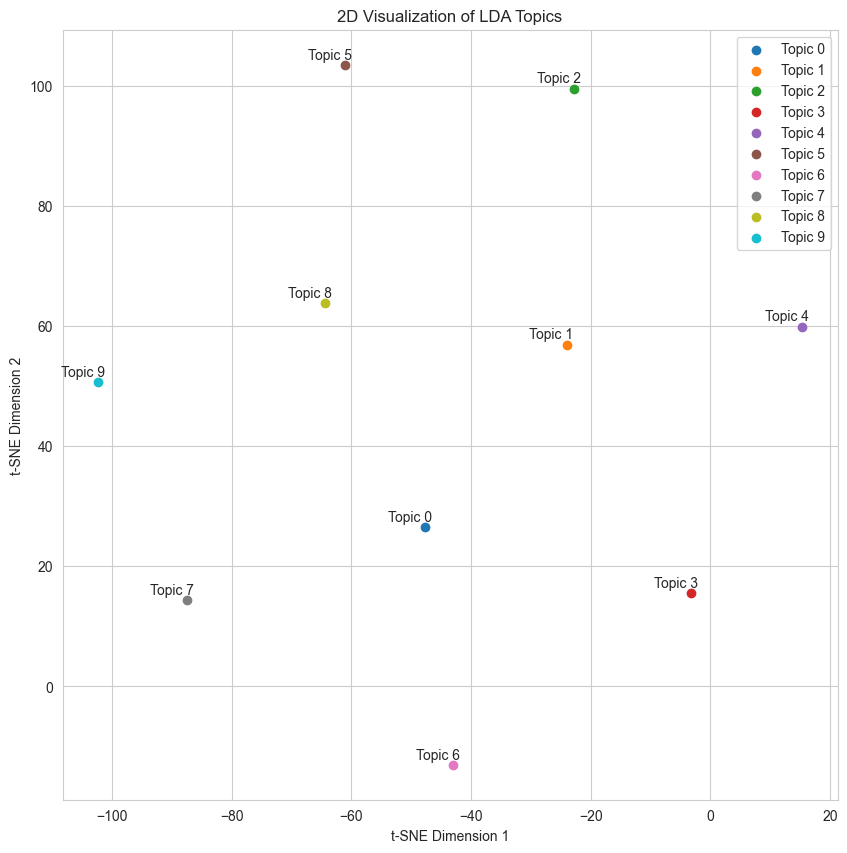

LSA Topics:
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 49.085759
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.004837
[t-SNE] KL divergence after 950 iterations: 0.233100


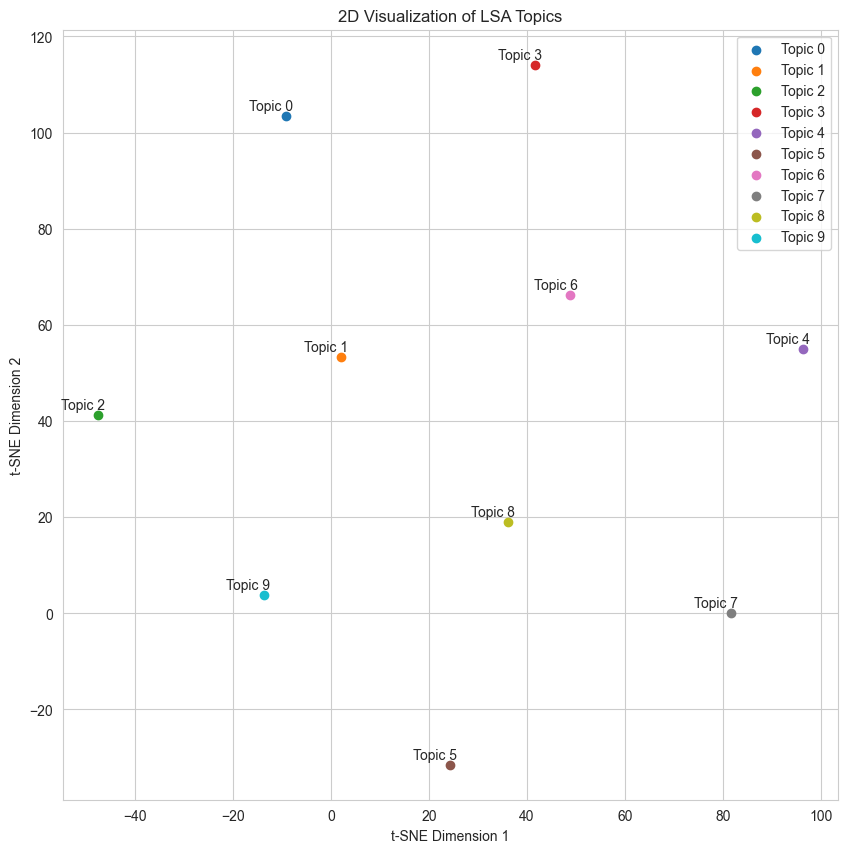

NMF Topics:
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1.754116
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.413769
[t-SNE] KL divergence after 850 iterations: 0.234695


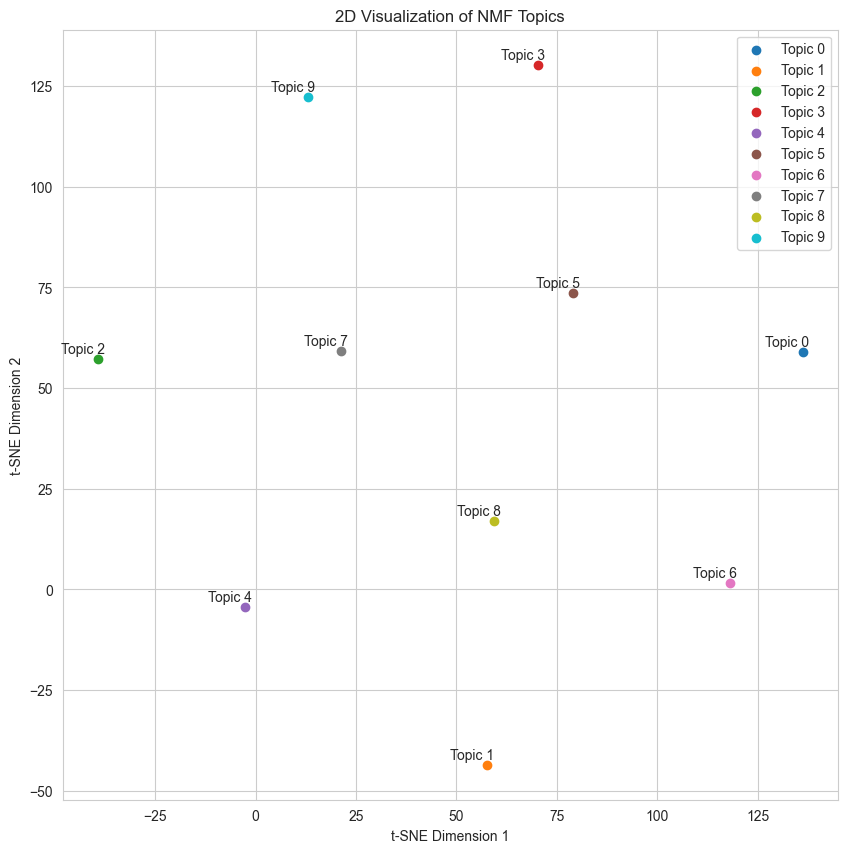

2D Visualization for dataset: NIPS_2015
LDA Topics:
[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 1.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] KL divergence after 300 iterations: 0.000000


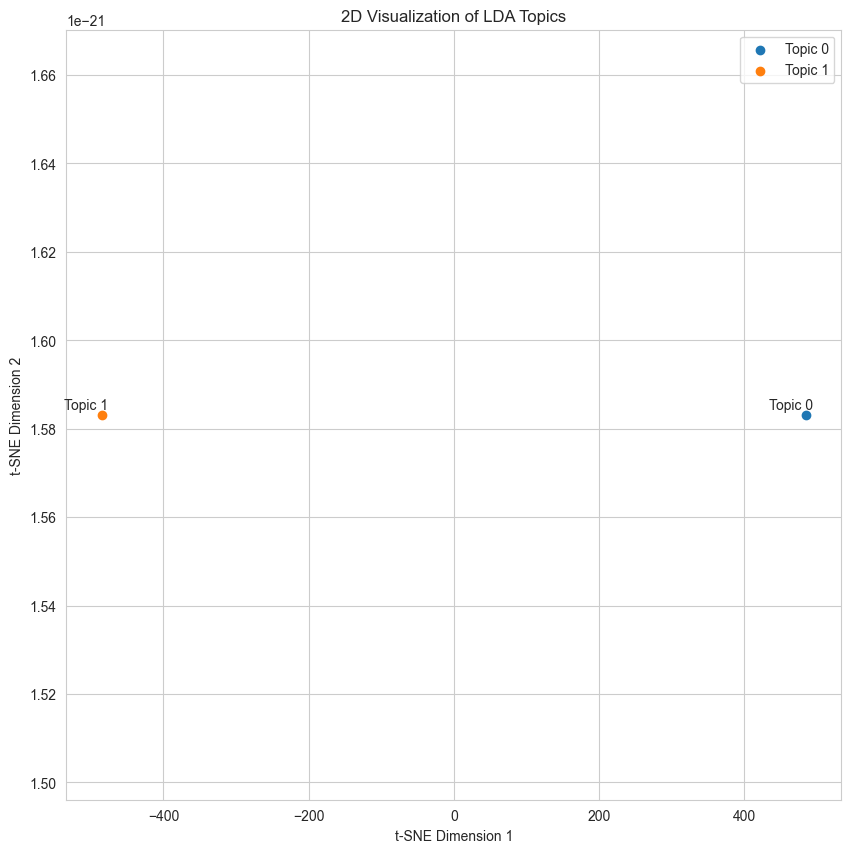

LSA Topics:
[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 1.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] KL divergence after 300 iterations: 0.000000


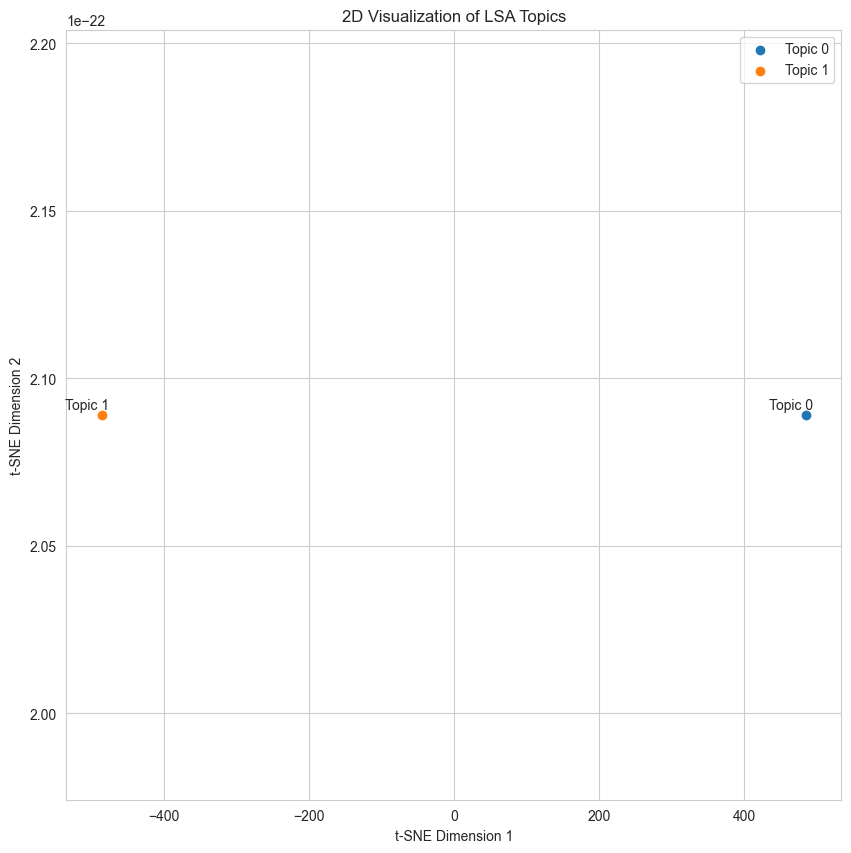

NMF Topics:
[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 1.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] KL divergence after 300 iterations: 0.000000


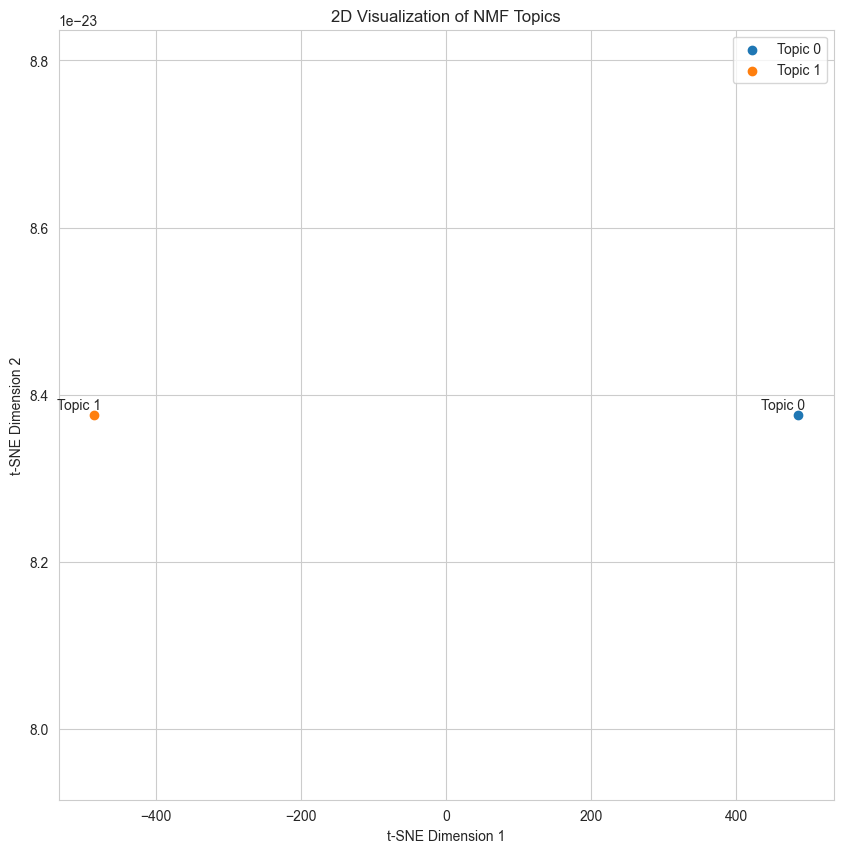

2D Visualization for dataset: NIPS_Papers
LDA Topics:
[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.472485
[t-SNE] KL divergence after 700 iterations: 0.349020


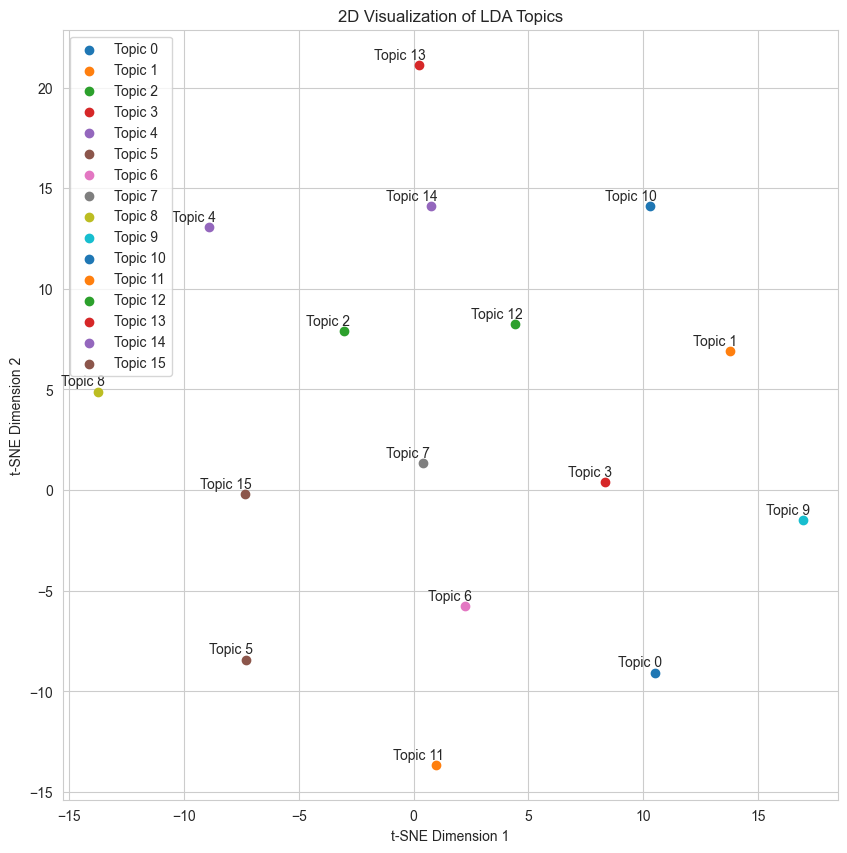

LSA Topics:
[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 10.975909
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.708820
[t-SNE] KL divergence after 1000 iterations: 0.330137


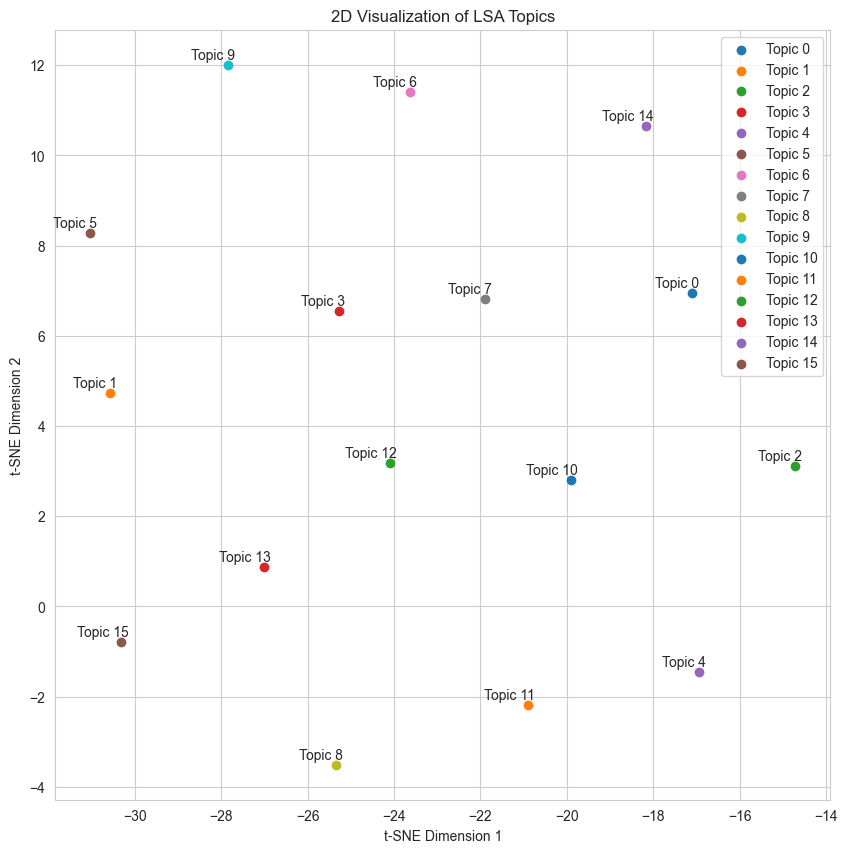

NMF Topics:
[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.420616
[t-SNE] KL divergence after 750 iterations: 0.349886


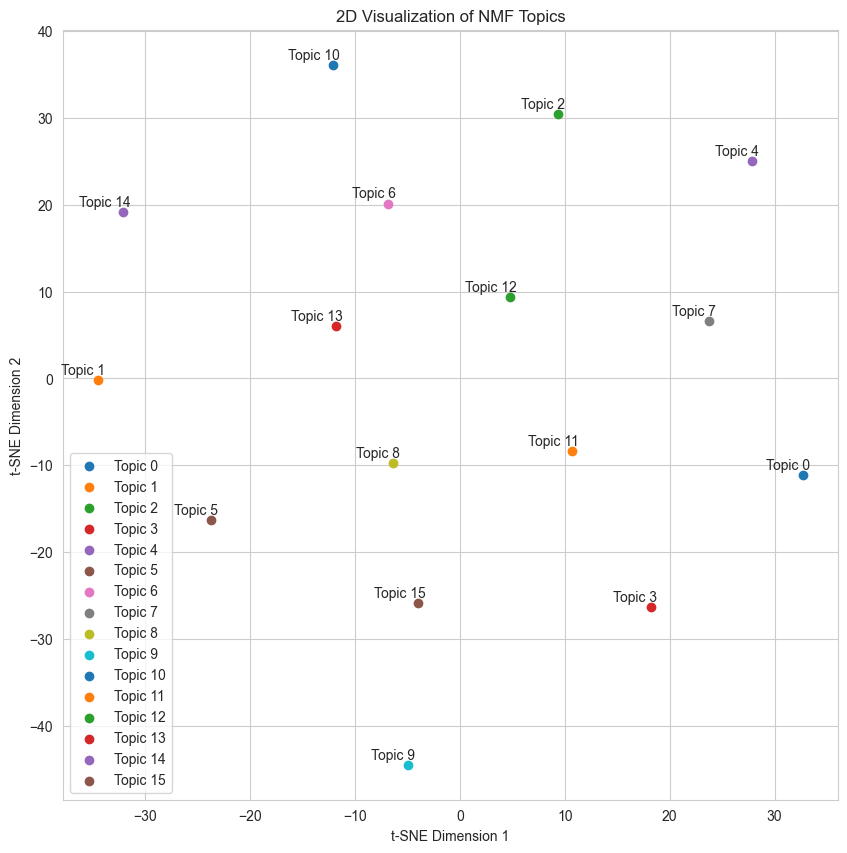

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_2d_topics(model, vectorizer, no_terms=10, model_type='LDA'):
    # Get topic-word distributions from the model
    if model_type == 'LDA':
        topic_word_distributions = model.components_
    else:  # For LSA and NMF, the components_ attribute directly gives us the topic-word distributions
        topic_word_distributions = model.components_
    # Normalize distributions
    topic_word_distributions = np.array([row / row.sum() for row in topic_word_distributions])
    # Use t-SNE for dimensionality reduction. Adjust the perplexity if necessary
    n_topics = topic_word_distributions.shape[0]
    tsne_perplexity = min(n_topics - 1, 30)  # Make sure perplexity is less than the number of topics
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca', perplexity=tsne_perplexity)
    tsne_topics = tsne_model.fit_transform(topic_word_distributions)
    # Plot the topics
    plt.figure(figsize=(10, 10))
    for i in range(tsne_topics.shape[0]):
        plt.scatter(tsne_topics[i, 0], tsne_topics[i, 1], label=f'Topic {i}')
        plt.annotate(f'Topic {i}',
                     xy=(tsne_topics[i, 0], tsne_topics[i, 1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title(f"2D Visualization of {model_type} Topics")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.show()

# Function to visualize all models for all datasets
def visualize_all_models(datasets, lda_models, lsa_models, nmf_models, vectorizers):
    for name, _ in datasets.items():
        print(f"2D Visualization for dataset: {name}")
        # Plot for LDA
        print(f"LDA Topics:")
        plot_2d_topics(lda_models[name], vectorizers[name]['count'], model_type='LDA')
        # Plot for LSA
        print(f"LSA Topics:")
        plot_2d_topics(lsa_models[name], vectorizers[name]['tfidf'], model_type='LSA')
        # Plot for NMF
        print(f"NMF Topics:")
        plot_2d_topics(nmf_models[name], vectorizers[name]['tfidf'], model_type='NMF')


visualize_all_models(datasets, trained_lda_models, trained_lsa_models, trained_nmf_models, {
    'NeuralIPS_1987-2019': {'count': fitted_count_vectorizers['NeuralIPS_1987-2019'], 'tfidf': fitted_tfidf_vectorizers['NeuralIPS_1987-2019']},
    'NIPS_2015': {'count': fitted_count_vectorizers['NIPS_2015'], 'tfidf': fitted_tfidf_vectorizers['NIPS_2015']},
    'NIPS_Papers': {'count': fitted_count_vectorizers['NIPS_Papers'], 'tfidf': fitted_tfidf_vectorizers['NIPS_Papers']}
})

Interpretaion of LDA, LSA and NMF topics for NeuralIPS dataset

**LSA Topics **

* Topic 0 and Topic 7 are relatively close to each other, which might indicate some similarity between them.
* Topic 3 is quite distant from the others, which suggests it is quite distinct from the rest of the topics.
* Topic 1, Topic 5, and Topic 2 are relatively close to each other, perhaps indicating that they share some similarities.

**LSF Topics **

* Topics are spread across the two-dimensional space after being reduced by t-SNE, which is a technique for visualizing high-dimensional data.
* Topics 4 and 7 are on the far right side, suggesting they are quite distinct from the other topics.
* Topic 3 is on the top, far from the center where most topics are clustered, indicating it might be significantly different from most other topics.
* Topics 1 and 2 are close to each other, suggesting a potential overlap or similarity in their content.
* Topic 0 is isolated on the far left, which could mean it has less in common with the other topics.

**NMP Topics**

* Topic 3 and Topic 9 are much higher on the t-SNE Dimension 2 axis than the other topics, which may indicate they have less in common with the rest of the topics.
* Topic 0 is far to the right along the t-SNE Dimension 1 axis, showing it as potentially distinct from the other topics.
* Topic 4 is near the origin, which might suggest it shares some commonalities with other topics that are closer to the center.
* Topics 1 and 8 are close to each other, hinting at a possible similarity in their underlying themes or content.
* The overall spread of topics is relatively even, suggesting a good separation of topics within the dataset.

## 7. Model Results

### Interactive Visualization of LDA Topic Models <a href='#13'>[13]</a>

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
pyLDAvis.enable_notebook()

def visualize_lda_models(datasets, lda_models, vectorizers):
    for name, dataset in datasets.items():
        print(f"Visualizing LDA model for dataset: {name}")
        vectorizer = vectorizers[name]['count']
        doc_term_matrix = vectorizer.transform(dataset)

        # Prepare the LDA model for visualization
        lda_model = lda_models[name]
        panel = pyLDAvis.lda_model.prepare(lda_model, doc_term_matrix, vectorizer, mds='tsne')

        # Display the interactive visualization
        display(panel)

# Visualize all LDA models
visualize_lda_models(datasets, trained_lda_models, {
    'NeuralIPS_1987-2019': {'count': fitted_count_vectorizers['NeuralIPS_1987-2019']},
    'NIPS_2015': {'count': fitted_count_vectorizers['NIPS_2015']},
    'NIPS_Papers': {'count': fitted_count_vectorizers['NIPS_Papers']}
})
# display(panel)

Visualizing LDA model for dataset: NeuralIPS_1987-2019


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6     -15.058081 -46.487843       1        1  29.999880
5      20.388752 -42.420364       2        1  29.996746
3     -40.169544 -21.083744       3        1   5.000889
1     -18.743792  39.676113       4        1   5.000481
4      -4.128035 -15.257780       5        1   5.000470
9       5.745872  12.542076       6        1   5.000407
8      41.815193  18.274876       7        1   5.000370
2     -30.533916   9.672297       8        1   5.000290
7      16.747149  43.711990       9        1   5.000246
0      32.153210 -12.429165      10        1   5.000221, topic_info=              Term      Freq     Total Category  logprob  loglift
13815          cid  0.000000  0.000000  Default  30.0000  30.0000
2333     algorithm  0.000000  0.000000  Default  29.0000  29.0000
39313        image  0.000000  0.000000  Default  28.0000  28.0000
59358      network  0.000000  0.000000  Default  27.0000  27.0000
53580       matrix  0.000000  0.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
17720      current  0.000260  0.001103  Topic10  -5.9539   1.5488
71796         rate  0.000300  0.002011  Topic10  -5.8100   1.0924
86085         task  0.000355  0.006503  Topic10  -5.6410   0.0876
40279  information  0.000308  0.005013  Topic10  -5.7836   0.2054
65039      pattern  0.000265  0.001565  Topic10  -5.9348   1.2185

[997 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 4, 2, 5, 10, 9, 3, 8, 1])

Visualizing LDA model for dataset: NIPS_2015


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      13.141898 -30.803396       1        1  72.154911
0     -13.141593  30.803640       2        1  27.845089, topic_info=            Term      Freq     Total Category  logprob  loglift
379    algorithm  0.000000  0.000000  Default  30.0000  30.0000
1528       bound  0.000000  0.000000  Default  29.0000  29.0000
5104    function  0.000000  0.000000  Default  28.0000  28.0000
7895         log  0.000000  0.000000  Default  27.0000  27.0000
10605    problem  0.000000  0.000000  Default  26.0000  26.0000
...          ...       ...       ...      ...      ...      ...
3064        data  0.002418  0.013228   Topic2  -5.4396  -0.4211
8287      matrix  0.002114  0.009391   Topic2  -5.5736  -0.2125
5467    gradient  0.001643  0.004392   Topic2  -5.8258   0.2953
7795      linear  0.001579  0.004029   Topic2  -5.8656   0.3419
4340       error  0.001634  0.005654   Topic2  -5.8314   0.0372

[191 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

Visualizing LDA model for dataset: NIPS_Papers


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8     -213.121765   17.818951       1        1  19.791667
3       34.211914    2.671243       2        1  19.791659
0       28.425453 -118.810616       3        1  19.791659
5      206.139908  173.253769       4        1   3.125003
6      -54.449669  224.520905       5        1   3.125002
4      162.761292  -83.268654       6        1   3.125002
9      128.049683 -217.498535       7        1   3.125001
2       48.015427  131.066193       8        1   3.125001
11    -184.137665 -142.884155       9        1   3.125001
7      -85.768654  -54.002426      10        1   3.125001
12     -48.643734 -226.093826      11        1   3.125001
10     276.223419    2.015022      12        1   3.125001
1      -73.573578   75.514191      13        1   3.125001
15     148.560852   50.314877      14        1   3.125001
14      83.970467  265.689636      15        1   3.125000
13    -180.661942  164.817719      16        1   3.125000, topic_info=              Term      Freq     Total Category  logprob  loglift
39918        model  0.000000  0.000000  Default  30.0000  30.0000
41894      network  0.000000  0.000000  Default  29.0000  29.0000
32211       kernel  0.000000  0.000000  Default  28.0000  28.0000
1681     algorithm  0.000000  0.000000  Default  27.0000  27.0000
34513     learning  0.000000  0.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
45831    parameter  0.000354  0.010038  Topic16  -5.5779   0.1221
20534       figure  0.000362  0.011827  Topic16  -5.5568  -0.0208
28748  information  0.000348  0.009194  Topic16  -5.5964   0.1914
66117       vector  0.000337  0.008358  Topic16  -5.6272   0.2559
1681     algorithm  0.000361  0.015681  Topic16  -5.5606  -0.3066

[1457 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 1, 6, 7, 5, 10, 3, 12, 8, 13, 11, 2, 16, 15, 14])

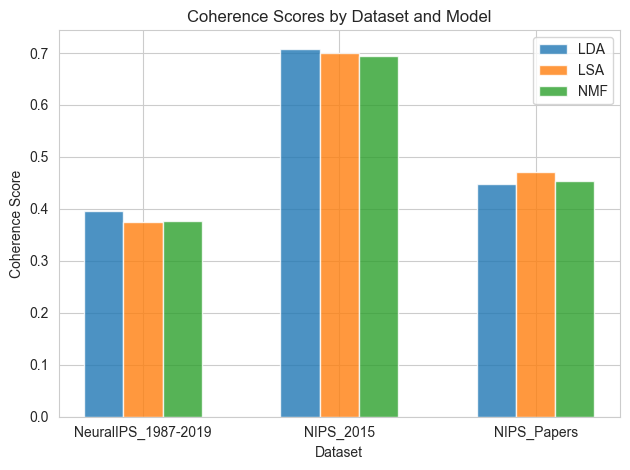

In [ ]:
import matplotlib.pyplot as plt

# Coherence scores for each dataset and model

coherence_scores = {

    'NeuralIPS_1987-2019': {'LDA': 0.39661512361803963, 'LSA': 0.3745197488767676, 'NMF': 0.37594700377346235},

    'NIPS_2015': {'LDA': 0.7081526717692943, 'LSA': 0.7004078477907267, 'NMF': 0.6944373853024053},

    'NIPS_Papers': {'LDA': 0.4486509617555344, 'LSA': 0.47053748362435366, 'NMF': 0.45286787339854295}

}

# Extracting datasets, models, and their scores

datasets = list(coherence_scores.keys())

models = list(coherence_scores[datasets[0]].keys())

scores = {model: [coherence_scores[dataset][model] for dataset in datasets] for model in models}

# Plotting

fig, ax = plt.subplots()

bar_width = 0.2

opacity = 0.8

index = np.arange(len(datasets))

for i, model in enumerate(models):

    ax.bar(index + i * bar_width, scores[model], bar_width, alpha=opacity, label=model)

ax.set_xlabel('Dataset')

ax.set_ylabel('Coherence Score')

ax.set_title('Coherence Scores by Dataset and Model')

ax.set_xticks(index + bar_width)

ax.set_xticklabels(datasets)

ax.legend()

plt.tight_layout()

plt.show()

This graph shows the coherence scores for three different topic modeling techniques—Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and Non-negative Matrix Factorization (NMF)—applied to three datasets named "NeuralIPS_1987-2019", "NIPS_2015", and "NIPS_Papers".

Here's a summary of the information presented in the bar chart:

1. For the "NeuralIPS" dataset, LDA has a coherence score just under 0.4, LSA is slightly above 0.3, and NMF is approximately 0.35.
2. In the "NIPS_2015" dataset, all three methods show higher coherence scores, with LDA and NMF being very close to each other at just above 0.6, and LSA slightly lower, around 0.58.
3. For the "NIPS_Papers" dataset, LDA has a coherence score of about 0.45, LSA around 0.3, and NMF is just under 0.4.

From this visualization, we can say that on the "NeuralIPS" and "NIPS_Papers" datasets, LDA performs the best in terms of coherence score, while for the "NIPS_2015" dataset, LDA and NMF have very similar performance and outperform LSA.

For identifing broad themes, LDA is most suitable.

For capturing the underlying structure or handling synonyms and polysemy, LSA will be beneficial.

To get distinct and interpretable topics, NMF is be the best choice.

## 8. Overall Conclusion


**Performance by Technique:**

LDA seems to be the most effective method in terms of creating distinct and coherent topics across the datasets examined. NMF also shows promise, performing comparably to LDA in one instance, while LSA consistently lags slightly behind in coherence scores.

**Dataset Suitability:**

 The variance in coherence scores across different datasets suggests that the effectiveness of each topic modeling technique may be context-dependent.

**Method Selection:**

When selecting a topic modeling method, we should consider not only the coherence scores but also the distinctness and separation of topics, as seen in the t-SNE visualizations. LDA appears to be a strong choice overall, but NMF could be preferred in cases where it produces similar coherence and better topic separation.

This overall analysis indicates that while LDA generally outperforms the other methods, NMF shows competitive performance in certain contexts. LSA seems to be less effective according to these metrics, but it might still be useful in combination with other methods or with further parameter tuning.

## References

1. "Neural Information Processing Systems Conference Papers," *Kaggle*, 2020. [Online]. Available: https://www.kaggle.com/datasets?search=NeurIPS. [Accessed: 07- Dec- 2023].

2. "NIPS 2015 Conference Papers," *Kaggle*, 2015. [Online]. Available: https://www.kaggle.com/datasets?search=NIPS+2015. [Accessed: 07- Dec- 2023].

3. "NIPS Conference Papers," *Kaggle*, 2019. [Online]. Available: https://www.kaggle.com/datasets?search=NIPS. [Accessed: 07- Dec- 2023].

4. D. Blei, A. Ng, and M. Jordan, "Latent dirichlet allocation," *Journal of Machine Learning Research*, vol. 3, pp. 993-1022, Jan. 2003.

5. T. Hofmann, "Probabilistic latent semantic indexing," in *Proceedings of the 22nd annual international ACM SIGIR conference on Research and development in information retrieval*, 1999, pp. 50-57.

6. D. Lee and H. Seung, "Algorithms for non-negative matrix factorization," in *Advances in neural information processing systems*, vol. 13, 2001.

7. M. Röder, A. Both, and A. Hinneburg, "Exploring the space of topic coherence measures," in *Proceedings of the eighth ACM international conference on Web search and data mining*, 2015, pp. 399-408.

8. D. M. Blei and J. D. Lafferty, "Dynamic topic models," in *Proceedings of the 23rd international conference on Machine learning*, 2006, pp. 113-120.

9. J. Chang, J. Boyd-Graber, S. Gerrish, C. Wang, and D. Blei, "Reading tea leaves: How humans interpret topic models," in *Advances in neural information processing systems*, vol. 22, 2009.

10. M. A. Hearst, "TextTiling: Segmenting text into multi-paragraph subtopic passages," *Computational linguistics*, vol. 23, no. 1, pp. 33-64, Mar. 1997.

11. "Scikit-learn: Machine Learning in Python," *Scikit-learn developers*, 2021. [Online]. Available: https://scikit-learn.org/stable/. [Accessed: 07- Dec- 2023].

12. "Gensim: Topic modeling for humans," *Gensim developers*, 2021. [Online]. Available: https://radimrehurek.com/gensim/. [Accessed: 07- Dec- 2023].

13. B. Mabey et al., "pyLDAvis: Python library for interactive topic model visualization." [Online]. Available: https://github.com/bmabey/pyLDAvis. [Accessed: 07- Dec- 2023].


